# Statement

A companhia de seguros Proteja Seu Amanhã quer resolver algumas tarefas com a ajuda de aprendizado de máquina e você precisa avaliar a possibilidade de fazê-lo.

- Tarefa 1: Encontrar clientes semelhantes a um determinado cliente. Isso vai ajudar os agentes da empresa com tarefas de marketing.
- Tarefa 2: Predizer se um novo cliente provavelmente receberá um pagamento de seguro. Um modelo de predição pode ser melhor do que um modelo dummy?
- Tarefa 3: Predizer o número de pagamentos de seguro que um novo cliente provavelmente receberá usando um modelo de regressão linear.
- Tarefa 4: Proteger os dados pessoais dos clientes sem estragar o modelo da tarefa anterior. É necessário desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas. Isso é chamado de mascaramento de dados ou ofuscação de dados. Mas os dados devem ser protegidos de forma que a qualidade dos modelos de aprendizado de máquina não piore. Você não precisa escolher o melhor modelo, só prove que o algoritmo funciona corretamente.

# Pré-processamento de dados & Exploração

## Inicialização

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 9.6 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 54.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


**Nesse iremos auxiliar a companhia de seguros Proteja Seu Amanhã a resolver algumas tarefas com a ajuda de aprendizado de máquina. Vamos desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas.**

Primeiro passo será importar as bibliotecas necessárias.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from IPython.display import display

import matplotlib.pyplot as plt

## Carregar Dados

Carregue os dados e faça uma verificação básica de que estão livres de problemas óbvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renomeamos as colunas para tornar o código mais consistente com seu estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4264,1,42.0,52600.0,0,1
2784,1,25.0,44300.0,0,0
3909,1,33.0,39000.0,3,0
1515,1,36.0,37400.0,0,0
3603,0,43.0,34300.0,2,1
2273,1,26.0,26200.0,4,0
4021,1,35.0,34900.0,1,0
1793,1,32.0,54400.0,0,0
747,0,33.0,41500.0,1,0
3129,0,32.0,51700.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Corrigindo variável idade para tipo int:

In [7]:
# podemos querer corrigir o tipo de idade (de float para int), embora isso não seja crítico

# escreva sua conversão aqui se você escolher:

df['age'] = df['age'].astype('int')

In [8]:
# verifique se a conversão foi bem-sucedida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Retirei dados duplicados da amostra. Não há dados faltantes. 

In [9]:
df.duplicated().sum()

153

In [10]:
df=df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.duplicated().sum()

0

Gerei alguns gráficos para ter uma visão geral dos dados e sua distribuição em cada variável. 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'family_members'}>],
       [<AxesSubplot:title={'center':'insurance_benefits'}>,
        <AxesSubplot:>]], dtype=object)

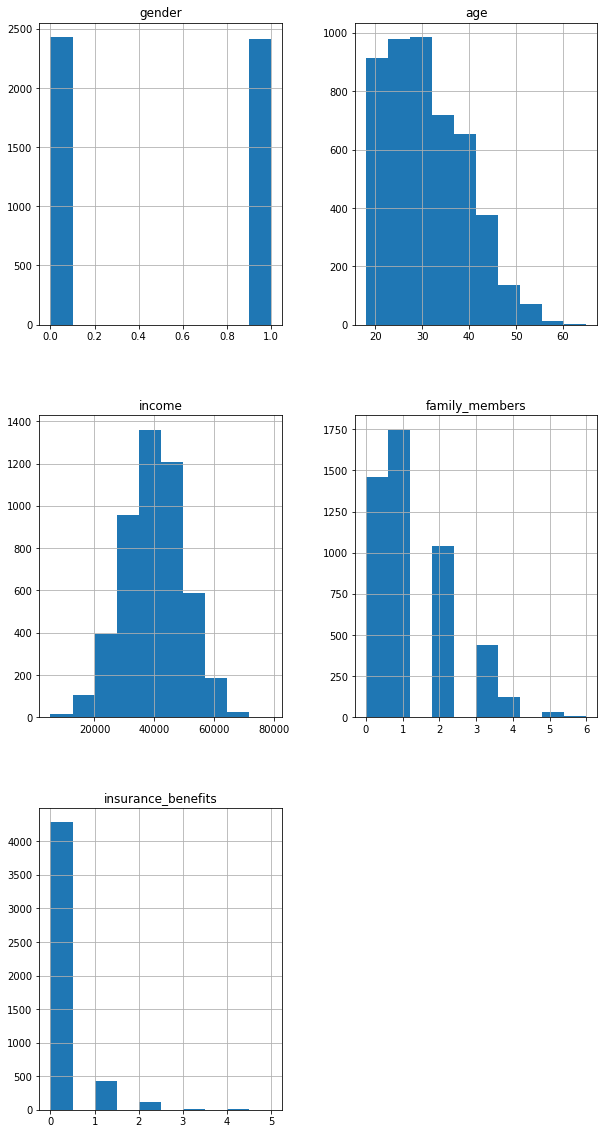

In [11]:
# agora dê uma olhada nas estatísticas descritivas dos dados.
# Parece que está tudo bem?
df.hist(figsize=(10,20))

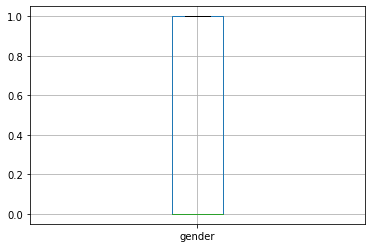

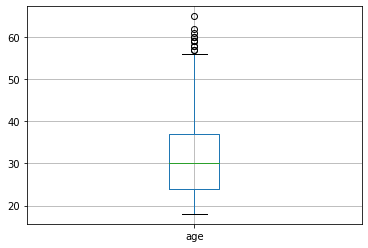

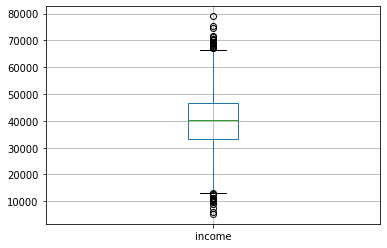

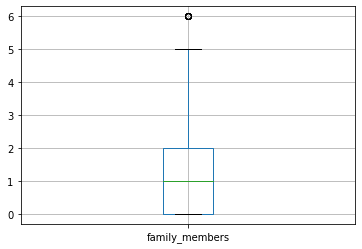

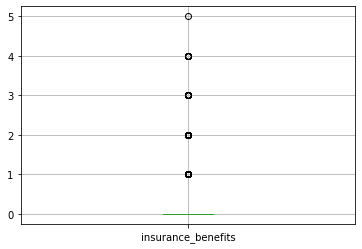

In [12]:
for i in df.columns:
    df.boxplot(i)
    plt.show()

Visão geral dos dados:

In [13]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Como as classes estão balanceadas? 

In [14]:
for i in df.columns:
    print('Value Counts:',i)
    print(df.value_counts(i))
    

Value Counts: gender
gender
0    2431
1    2416
dtype: int64
Value Counts: age
age
19    213
25    205
31    202
27    201
22    201
26    201
28    196
32    196
30    196
29    196
23    195
21    193
20    190
33    186
36    186
24    176
34    173
35    173
37    143
39    140
38    135
41    124
18    116
40    110
42     93
43     77
44     74
45     73
46     60
47     47
49     37
48     26
50     26
52     22
51     21
53     11
55      9
54      7
56      5
59      3
57      2
58      2
60      2
61      1
62      1
65      1
dtype: int64
Value Counts: income
income
45800.0    28
37100.0    27
32800.0    26
38800.0    26
42100.0    25
           ..
17600.0     1
17500.0     1
17400.0     1
17100.0     1
79000.0     1
Length: 524, dtype: int64
Value Counts: family_members
family_members
1    1748
0    1461
2    1038
3     437
4     124
5      32
6       7
dtype: int64
Value Counts: insurance_benefits
insurance_benefits
0    4284
1     423
2     114
3      18
4       7
5      

A única correlação mais relevante é entre idade e insurance_benefits: 65%

In [15]:
df.corr()

,gender,age,income,family_members,insurance_benefits
gender,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
income,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_benefits,0.011565,0.654964,-0.013123,-0.039303,1.000000


## AED

Vamos verificar rapidamente se existem determinados grupos de clientes observando o gráfico de pares.

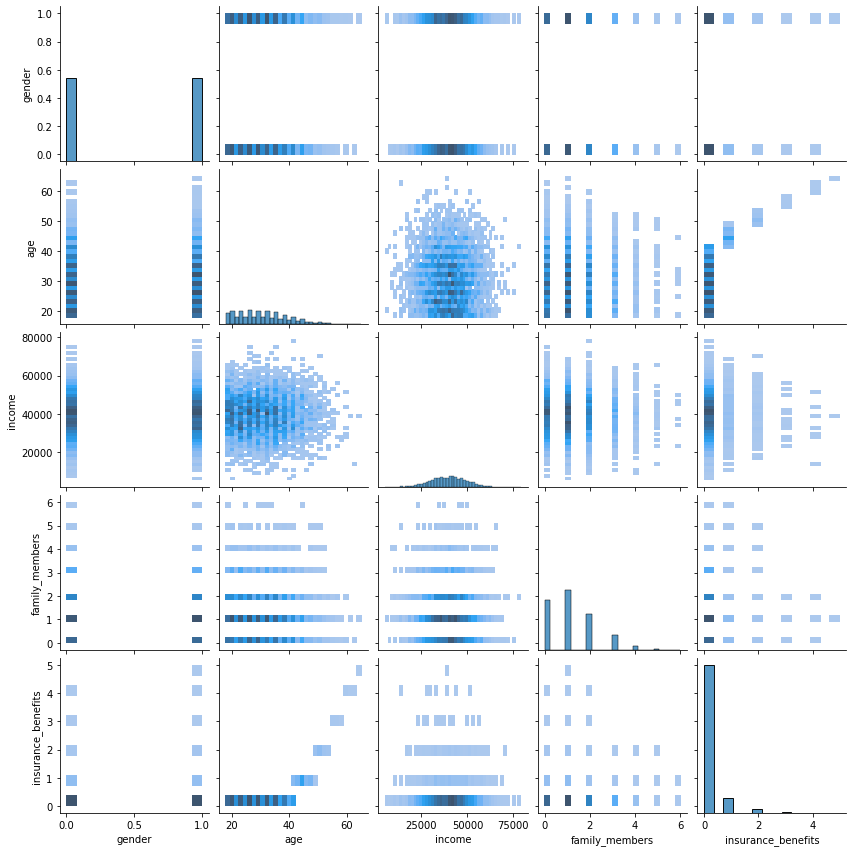

In [16]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, é um pouco difícil identificar grupos óbvios (clusters), pois é difícil combinar várias variáveis simultaneamente (para analisar distribuições multivariadas). É aí que Álgebra Linear e Aprendizado de Máquina podem ser bastante úteis.

# Tarefa 1. Clientes Similares

Na linguagem de AM, é necessário desenvolver um procedimento que retorne k vizinhos mais próximos (objetos) para um determinado objeto com base na distância entre os objetos.
Você pode querer rever as seguintes lições (capítulo -> lição)- Distância Entre Vetores -> Distância Euclidiana
- Distância Entre Vetores -> Distância de Manhattan

Para resolver a tarefa, podemos tentar diferentes métricas de distância.

Escreva uma função que retorne k vizinhos mais próximos para um n-ésimo objeto com base em uma métrica de distância especificada. O número de pagamentos de seguro recebidos não deve ser levado em consideração para esta tarefa. 

Você pode usar uma implementação pronta do algoritmo kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) ou usar a sua própria.
Teste-o para quatro combinações de dois casos
- Escalabilidade
  - os dados não são escalados
  - os dados escalados com o escalonador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Métricas de distância
  - Euclidiana
  - Manhattan

Responda às perguntas:
- Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?
-Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?

In [17]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [18]:
def get_knn(df, n, k, metric):
    
    """
    Retorna os vizinhos mais próximos de k

    :param df: DataFrame pandas usado para encontrar objetos semelhantes dentro de    
    :param n: número do objeto pelo qual os vizinhos mais próximos são procurados
    :param k: o número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância    """

    nbrs =  NearestNeighbors(n_neighbors=k, metric=metric ) # <escreva seu código aqui> 
    nbrs.fit(df[feature_names],df['insurance_benefits'])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalando os dados

In [19]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [20]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1939,0.0,0.338462,0.432911,0.666667,0
2164,1.0,0.600000,0.535443,0.000000,0
108,1.0,0.600000,0.507595,0.333333,0
1935,1.0,0.600000,0.251899,0.166667,0
421,1.0,0.461538,0.524051,0.333333,0


Agora, vamos obter registros semelhantes para um determinado registro para cada combinação

In [21]:
no_scale_euc=get_knn(df,2,5,'euclidean')

In [22]:
no_scale_euc

,gender,age,income,family_members,insurance_benefits,distance
2,0,29,21000.0,0,0,0.000000
4407,1,31,21000.0,1,0,2.449490
2001,0,30,20900.0,0,0,100.005000
1717,1,28,21100.0,0,0,100.010000
4656,0,28,21100.0,2,0,100.024997


In [23]:
no_scale_manh=get_knn(df,2,5,'manhattan')
no_scale_manh

,gender,age,income,family_members,insurance_benefits,distance
2,0,29,21000.0,0,0,0.0
4407,1,31,21000.0,1,0,4.0
2001,0,30,20900.0,0,0,101.0
1717,1,28,21100.0,0,0,102.0
4656,0,28,21100.0,2,0,103.0


In [24]:
scale_euc=get_knn(df_scaled,2,5,'euclidean')
scale_euc

,gender,age,income,family_members,insurance_benefits,distance
2,0.0,0.446154,0.265823,0.0,0,0.000000
507,0.0,0.446154,0.255696,0.0,0,0.010127
224,0.0,0.446154,0.277215,0.0,0,0.011392
2001,0.0,0.461538,0.264557,0.0,0,0.015437
645,0.0,0.461538,0.289873,0.0,0,0.028550


In [25]:
scale_manh=get_knn(df_scaled,2,5,'manhattan')
scale_manh

,gender,age,income,family_members,insurance_benefits,distance
2,0.0,0.446154,0.265823,0.0,0,0.000000
507,0.0,0.446154,0.255696,0.0,0,0.010127
224,0.0,0.446154,0.277215,0.0,0,0.011392
2001,0.0,0.461538,0.264557,0.0,0,0.016650
645,0.0,0.461538,0.289873,0.0,0,0.039435


Respostas para as perguntas

**Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?** 

Podemos perceber que os resultados diferem quando usamos dados escalonados e não escalonados. Isso ocorre porque nos dados não escalonados, algumas variáveis acabam tendo um peso maior na escolha da menor distância, como, por exemplo, a variável income que numericamente é maior em escala em relação às outras. Por isso, acaba tendo um peso maior no algoritmo. Nos dados não escalonados a magnitude da distância fica bem superior em relação aos escalonados. mo. 

**Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?** 

Tanto usando dados escalonados quanto não escalonados, os resultados da distância de Manhattan ficaram próximos a distância euclidiana. As duas distâncias escolheram os mesmos vizinhos. A diferença fica na magnitude. A distância de Manhattan é levemente superior a Euclidiana, mas isso já é esperado pela característica dessa métrica. 

# Tarefa 2. É provável que o cliente receba um pagamento do seguro?

Em termos de aprendizado de máquina, podemos olhar para isso como uma tarefa de classificação binária.

Com os pagamentos de seguro sendo mais do que zero como objetivo, avalie se a abordagem da classificação kNN pode ser melhor do que um modelo dummy.

Instruções:
- Construa um classificador baseado em kNN e meça sua qualidade com a métrica F1 para k=1..10 tanto para os dados originais quanto para os escalados. Seria interessante ver como k pode influenciar a métrica de avaliação e se a escalabilidade dos dados faz alguma diferença. Você pode usar uma implementação pronta do algoritmo de classificação kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) ou usar a sua própria.
- Construa o modelo dummy, que é aleatório para este caso. Deve retornar com alguma probabilidade o valor "1". LVamos testar o modelo com quatro valores de probabilidade: 0, a probabilidade de fazer qualquer pagamento de seguro, 0,5, 1.

A probabilidade de fazer qualquer pagamento de seguro pode ser definida como

$$
P\{\text{pagamento de seguro recebido}= número de clientes que receberam qualquer pagamento de seguro}}{\text{número total de clientes}}.
$$

Divida os dados inteiros na proporção 70:30 para as partes de treinamento/teste.

Ajustei conforme solicitado. Todos que usaram o seguro são 1. Se não usou 0.  

In [26]:
# calcule a meta
df.loc[df['insurance_benefits'] >= 1, 'insurance_benefits_received'] = 1
df.loc[df['insurance_benefits'] < 1, 'insurance_benefits_received'] = 0


In [27]:
# verifique o desequilíbrio de classe com value_counts()

# <seu código aqui>
df['insurance_benefits_received'].value_counts()

0.0    4284
1.0     563
Name: insurance_benefits_received, dtype: int64

Estudando desequilibro de classes. 88% não usaram o benefício. 

In [28]:
df['insurance_benefits_received'].value_counts() / len(df['insurance_benefits_received'])

0.0    0.883846
1.0    0.116154
Name: insurance_benefits_received, dtype: float64

In [29]:
df_scaled.loc[df['insurance_benefits'] >= 1, 'insurance_benefits_received'] = 1
df_scaled.loc[df['insurance_benefits'] < 1, 'insurance_benefits_received'] = 0
df_scaled['insurance_benefits_received'].value_counts()

0.0    4284
1.0     563
Name: insurance_benefits_received, dtype: int64

Aqui dividi a ambas as tabelas (escalonada ou não) em target e features. Dividi em 70% os dados em treinamento (70%) e teste (30%). 

In [30]:
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
target = df['insurance_benefits_received']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state=12345)


In [31]:
features_scaled = df_scaled.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
target_scaled = df_scaled['insurance_benefits_received']
features_train_scaled, features_test_scaled, target_train_scaled, target_test_scaled = train_test_split(features_scaled, target_scaled, test_size = 0.3, random_state=12345)

Definição das funções:

In [32]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# se você tiver um problema com a linha a seguir, reinicie o kernel e execute o caderno novamente
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    print('Matriz de Confusão')
    print(cm)

In [33]:
# gerando saída de um modelo aleatório

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

Testamos o modelo com 4 probabilidades.
Primeiro dados originais:

In [34]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,target_test.shape[0]) # <seu código aqui>
        
    eval_classifier(target_test, y_pred_rnd)
    
    print()

A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[1287    0]
 [ 168    0]]

A probabilidade: 0.12
F1: 0.16
Matriz de Confusão
[[1140  147]
 [ 140   28]]

A probabilidade: 0.50
F1: 0.22
Matriz de Confusão
[[662 625]
 [ 72  96]]

A probabilidade: 1.00
F1: 0.21
Matriz de Confusão
[[   0 1287]
 [   0  168]]



Dados escalonados:

In [35]:
for P in [0, df_scaled['insurance_benefits_received'].sum() / len(df_scaled), 0.5, 1]:

    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,target_test_scaled.shape[0]) # <seu código aqui>
        
    eval_classifier(target_test_scaled, y_pred_rnd)
    
    print()

A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[1287    0]
 [ 168    0]]

A probabilidade: 0.12
F1: 0.16
Matriz de Confusão
[[1140  147]
 [ 140   28]]

A probabilidade: 0.50
F1: 0.22
Matriz de Confusão
[[662 625]
 [ 72  96]]

A probabilidade: 1.00
F1: 0.21
Matriz de Confusão
[[   0 1287]
 [   0  168]]



Testando com k=1 até 10 o modelo de classificador baseado em kNN. 

In [36]:
for k in range(1,11):

    print(f'K igual a: {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    
        
    eval_classifier(target_test, pred_test)
    
    print()

K igual a: 1
F1: 0.67
Matriz de Confusão
[[1254   33]
 [  66  102]]

K igual a: 2
F1: 0.37
Matriz de Confusão
[[1280    7]
 [ 128   40]]

K igual a: 3
F1: 0.38
Matriz de Confusão
[[1268   19]
 [ 124   44]]

K igual a: 4
F1: 0.18
Matriz de Confusão
[[1280    7]
 [ 151   17]]

K igual a: 5
F1: 0.23
Matriz de Confusão
[[1277   10]
 [ 145   23]]

K igual a: 6
F1: 0.06
Matriz de Confusão
[[1286    1]
 [ 163    5]]

K igual a: 7
F1: 0.07
Matriz de Confusão
[[1285    2]
 [ 162    6]]

K igual a: 8
F1: 0.00
Matriz de Confusão
[[1287    0]
 [ 168    0]]

K igual a: 9
F1: 0.01
Matriz de Confusão
[[1287    0]
 [ 167    1]]

K igual a: 10
F1: 0.00
Matriz de Confusão
[[1287    0]
 [ 168    0]]



Testando com dados escalonados:

In [37]:
for k in range(1,11):

    print(f'K igual a: {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train_scaled,target_train_scaled)
    pred_test = model.predict(features_test_scaled)
    
        
    eval_classifier(target_test_scaled, pred_test)
    
    print()

K igual a: 1
F1: 0.93
Matriz de Confusão
[[1280    7]
 [  17  151]]

K igual a: 2
F1: 0.89
Matriz de Confusão
[[1284    3]
 [  32  136]]

K igual a: 3
F1: 0.91
Matriz de Confusão
[[1281    6]
 [  24  144]]

K igual a: 4
F1: 0.88
Matriz de Confusão
[[1283    4]
 [  34  134]]

K igual a: 5
F1: 0.89
Matriz de Confusão
[[1280    7]
 [  27  141]]

K igual a: 6
F1: 0.87
Matriz de Confusão
[[1283    4]
 [  35  133]]

K igual a: 7
F1: 0.90
Matriz de Confusão
[[1283    4]
 [  28  140]]

K igual a: 8
F1: 0.86
Matriz de Confusão
[[1283    4]
 [  37  131]]

K igual a: 9
F1: 0.87
Matriz de Confusão
[[1283    4]
 [  35  133]]

K igual a: 10
F1: 0.86
Matriz de Confusão
[[1283    4]
 [  37  131]]



Analisado todos os F1 gerados podemos constatar que o modelo aleatório nas 4 probabilidades é pior que o classificador baseado em Knn. Também foi notório que o desempenho com os dados escalonados é muito superior, com F1 maior que 85% para todos k-vizinhos de 1 a 10. O melhor modelo foi o KNeighborsClassifier, com k = 1 nos dados escalonados.  

# Tarefa 3. Regressão (com Regressão Linear)

Com os pagamentos de seguro como objetivo, avalie qual seria o REQM para um modelo de Regressão Linear.

Construa sua própria implementação de Regressão Linear. Para isso, lembre-se de como a solução da tarefa de regressão linear é formulada em termos de Álgebra linear. Verifique o REQM para os dados originais e os escalados. Você pode ver alguma diferença no REQM entre esses dois casos?

Vamos denotar
- $X$ — matriz de características, cada linha é um caso, cada coluna é uma característica, a primeira coluna consiste em unidades
- $y$ — objetivo (um vetor)
- $\hat{y}$ — objetivo estimado (um vetor)- $w$ — vetor de peso

A tarefa de regressão linear na linguagem de matrizes pode ser formulada como
$$
y = Xw
$$

O objetivo do treinamento, então, é encontrar os $w$ que minimizaria a distância L2 (EQM) entre $Xw$ e $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que há uma solução analítica para a questão acima:

$$
w = (X^T X)^{-1} X^T y
$$

A fórmula acima pode ser usada para encontrar os pesos $w$ e o último pode ser usado para calcular valores preditos

$$
\hat{y} = X_{val}w
$$

Divida todos os dados na proporção 70:30 para as partes de treinamento/validação. Use a métrica REQM para a avaliação do modelo.

In [38]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# <seu código aqui>
        

    def predict(self, X):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) # <seu código aqui>
        y_pred = X2.dot(self.weights) # <seu código aqui>
        
        return y_pred

In [39]:
import math

In [40]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'REQM: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

Treinando modelo regressão linear nos dados originais: 

In [41]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
REQM: 0.36
R2: 0.66


Treinando modelo regressão linear nos dados escalonados: 

In [42]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
REQM: 0.36
R2: 0.66


Percebemos que o REQM e R2 não mudou após a escalonação dos dados. 

# Tarefa 4. Ofuscando dados

É melhor ofuscar os dados multiplicando as características numéricas (lembre-se, elas podem ser vistos como a matriz $X$) por uma matriz invertível $P$. 

$$
X' = X \times P
$$

Tente fazer isso e verifique como os valores das características ficarão após a transformação. Aliás, a invertibilidade é importante aqui, portanto, certifique-se de que $P$ seja realmente invertível.

Você pode querer revisar a lição 'Matrizes e Operações com Matrizes -> Multiplicação de Matrizes' para relembrar a regra de multiplicação de matrizes e sua implementação com NumPy.

In [43]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [44]:
X = df_pn.to_numpy()

Gerando uma matriz $P$ aleatória.

In [45]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Verificando se a matriz $P$ é invertível

In [46]:
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [47]:
inverP = np.linalg.inv(P)
inverP

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Comprovação matemática da inversibilidade da Matriz aleatória P: 

In [48]:
a = P @ inverP
I = [[round(valor,3) for valor in linha] for linha in a]
I

[[1.0, -0.0, -0.0, -0.0],
 [-0.0, 1.0, -0.0, 0.0],
 [-0.0, -0.0, 1.0, 0.0],
 [-0.0, -0.0, 0.0, 1.0]]

Você consegue adivinhar a idade ou a renda dos clientes após a transformação?

In [49]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [50]:
xl = X @ P
xl

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Você pode recuperar os dados originais de $X′$ se souber $P$? Tente verificar isso com cálculos movendo $P$ do lado direito da fórmula acima para o esquerdo. As regras da multiplicação de matrizes são realmente úteis aqui

In [51]:
Xrec = xl @ inverP
Xrec

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Imprima todos os três casos para alguns clientes:
- Os dados originais
- O transformado
- O invertido (recuperado)

In [52]:
X_df = pd.DataFrame(X, columns = personal_info_column_list)
X_df

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4842,0.0,28.0,35700.0,2.0
4843,0.0,34.0,52400.0,1.0
4844,0.0,20.0,33900.0,2.0
4845,1.0,22.0,32700.0,3.0


In [53]:
xl_df = pd.DataFrame(xl, columns = personal_info_column_list)
xl_df

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
...,...,...,...,...
4842,4577.581382,16107.740932,13259.688205,33107.974380
4843,6717.000247,23634.217067,19456.138634,48589.438841
4844,4346.223425,15289.241265,12586.162644,31433.508886
4845,4194.093242,14751.991024,12144.029306,30323.887634


In [54]:
Xrec_df = pd.DataFrame(Xrec, columns = personal_info_column_list)
Xrec_df

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4842,-2.559766e-12,28.0,35700.0,2.000000e+00
4843,-5.486091e-12,34.0,52400.0,1.000000e+00
4844,-1.928379e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


Você provavelmente pode ver que alguns valores não são exatamente iguais aos dos dados originais. Qual pode ser a razão disso?

Ficou levemente diferente, pois na obtenção da matriz inversa, temos que realizar cálculos de divisão. Como temos limitados número de casas decimais, isso pode ocasionar em leves desvios após a virgula. 

## Provas de que a ofuscação de dados pode funcionar com a Regressão Linear

A tarefa de regressão foi resolvida com regressão linear neste projeto. Sua próxima tarefa é provar analiticamente que o método de ofuscação fornecido não afetará a regressão linear em termos de valores preditos, ou seja, seus valores permanecerão os mesmos. Você acredita nisso? Bem, você não precisa acreditar, você deve provar isso!

Assim, os dados são ofuscados e há $X \ P$ em vez de apenas X agora. Consequentemente, existem outros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Como  $w$ e $w_P$ seriam ligados se você simplificasse a fórmula para $w_P$ acima? 

Quais seriam os valores previstos com $w_P$? 

O que isso significa para a qualidade da regressão linear se você medir com REQM?

Verifique o Apêndice B Propriedades das Matrizes no final do caderno. Existem fórmulas úteis lá!

Nenhum código é necessário nesta seção, apenas explicação analítica!

**Resposta**

Os valores previstos mudariam proporcionalmente a matriz inversa de P. Entretanto seu comportamento permanece o mesmo. Por isso, o REQM não se altera.   

**Prova analítica**

$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

$$
w_P = [(X^TP^T) XP]^{-1} (X^TP^T) y
$$

$$
w_P = (X^TP^T)^{-1} X^{-1}P^{-1} X^TP^T y
$$

$$
w_P = (X^TX)^{-1}X^T y  P^{-1} I 
$$

$$
w_P = w P^{-1}
$$

## Teste de regressão linear com ofuscação de dados

Agora, vamos provar que a Regressão Linear pode funcionar computacionalmente com a transformação de ofuscação escolhida.
Crie um procedimento ou uma classe que execute a Regressão Linear opcionalmente com a ofuscação. Você pode usar uma implementação pronta de Regressão Linear do scikit-learn ou sua própria.

Execute a Regressão Linear para os dados originais e os ofuscados, compare os valores previstos e os valores da métrica $R^2$ do REQM. Há alguma diferença?

**Procedimento**

- Crie uma matriz quadrada $P$ de números aleatórios.
- Verifique se é invertível. Caso contrário, repita o primeiro ponto até obtermos uma matriz invertível.
- <! seu comentário aqui!>
- Use $XP$ como a nova matriz de características

Criando matriz quadrada $P$ de números aleatórios.

In [55]:
rng = np.random.default_rng(seed=44)
P = rng.random(size=(X.shape[1], X.shape[1]))

Verificando se P é invertível.

In [56]:
inverP = np.linalg.inv(P)
inverP

array([[ 1.84924652, -1.99242482, -2.87296683,  3.23934712],
       [-0.6986208 ,  1.59813959,  0.35378438, -0.44011064],
       [-1.56813283,  0.55761715,  3.34517197, -2.30450705],
       [ 1.64052626, -0.40710835, -1.13142876,  0.67238793]])

In [57]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

Ofuscando os dados

In [58]:
xl = X @ P
obf = pd.DataFrame(xl, columns = personal_info_column_list)
df_obf = pd.concat([obf, df['insurance_benefits']], axis = 1)
df_obf

,gender,age,income,family_members,insurance_benefits
0,33621.178887,30592.461588,47382.348955,20445.572697,0
1,25760.044716,23441.098470,36306.955260,15677.831597,1
2,14235.733565,12954.702882,20065.426797,8667.522733,0
3,28265.494644,25716.748826,39830.790370,17175.804349,0
4,17692.159685,16099.626338,24935.358508,10765.035493,0
...,...,...,...,...,...
4842,24200.015698,22019.350588,34104.013781,14714.183952,0
4843,35517.782500,32316.093183,50053.166774,21590.372634,0
4844,22979.134103,20907.524175,32381.882520,13965.909075,0
4845,22167.213812,20169.983438,31237.649282,13474.523930,0


Testando os modelos de regressão linear com dados originais e ofuscados.  

In [59]:
features_obf = df_obf.drop('insurance_benefits',axis=1)
target_obf = df_obf['insurance_benefits']

In [60]:
features_train_obf, features_test_obf, target_train_obf, target_test_obf = train_test_split(
    features_obf, target_obf, test_size=0.3, random_state=12345)

In [61]:
model = LinearRegression() 
model.fit(features_train_obf,target_train_obf) 
predictions_test_obf = model.predict(features_test_obf) 

eval_regressor(target_test_obf, predictions_test_obf)

REQM: 0.36
R2: 0.66


In [62]:
features = df.drop(['insurance_benefits','insurance_benefits_received'],axis=1)
target = df['insurance_benefits']

In [63]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=12345)

In [64]:
model = LinearRegression() 
model.fit(features_train,target_train) 
predictions_test = model.predict(features_test) 
eval_regressor(target_test, predictions_test)

REQM: 0.36
R2: 0.66


Percebemos que o REQM e R2 mantiveram-se iguais após a ofuscação dos dados. 

Testando também com MyLinearRegression()

In [65]:
Y_train = target_train.to_numpy()
X_train = features_train.to_numpy()
Y_test = target_test.to_numpy()
X_tes = features_test.to_numpy()

lr = MyLinearRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_tes)
eval_regressor(Y_test, predictions)

REQM: 0.36
R2: 0.66


Dados ofuscados:

In [66]:
Y_train_obf = target_train_obf.to_numpy()
X_train_obf = features_train_obf.to_numpy()
Y_test_obf = target_test_obf.to_numpy()
X_tes_obf = features_test_obf.to_numpy()

lr = MyLinearRegression()
lr.fit(X_train_obf,Y_train_obf)
predictions_obf = lr.predict(X_tes_obf)
eval_regressor(Y_test_obf, predictions_obf)

REQM: 0.36
R2: 0.66


Resultados iguais ao anteriomente apresentados. Não houve mudanças.  

# Conclusões

Na tarefa 1 criamos uma função que encontra clientes semelhantes de usando o algoritmo kNN para k vizinhos mais próximos.   Após definir a função testei a escalabilidade dos dados e métricas de distância. Cheguei à conclusão que o escalonamento dos dados impacta em quais são os vizinhos mais próximos de algum cliente, já que algumas variáveis como income possuem um peso maior. Testando as métricas usando a distância Euclidiana ou Manhattan não há discrepância em quais são os vizinhos escolhidos, apenas na magnitude. A distância Manhattan é levemente superior.

Na Tarefa 2 examinamos o desequilibro de classes e descobrimos que 88% dos clientes não haviam acionado o seguro.  Testamos um modelo de classificador baseado em kNN para k=1...10 e um modelo dummy aleatório que retorna a probabilidade do valor 1 para 4 cenários. Chegamos a conclusão de que o modelo com melhor F1 foi o KNeighborsClassifier, com k = 1 nos dados escalonados.

Na Tarefa 3 criamos nossa própria implementação de Regressão Linear. Vimos que tanto o modelo usando dados originais quanto dados escalonados apresentaram os mesmos resultados: REQM = 0,36 e R2=0,66

Na Tarefa 4 usamos os conhecimentos de álgebra linear para ofuscar os valores das características dos clientes.  Percebemos que alguns valores não ficaram exatamente iguais aos originais, mas as diferenças são muito pequenas provocadas pelo arredondamento de casas decimais.

Por fim, provamos que:

$$
w_P = w P^{-1}
$$

E que os resultados da regressão linear não mudam após a ofuscação dos dados. 


# Checklist

Digite 'x' para verificar. Em seguida, pressione Shift + Enter.

- [x]  O Jupyter Notebook está aberto.
- [ ]  O código está livre de erros
- [ ]  As células são organizadas em ordem de lógica e execução
- [ ]  A tarefa 1 foi executada
    - [ ]  Existe o procedimento que pode retornar k clientes semelhantes a um determinado cliente
    - [ ]  O procedimento é testado para todas as quatro combinações propostas
    - [ ]  As perguntas sobre a escala/distâncias são respondidas
- [ ]  A tarefa 2 foi executada
    - [ ]  O modelo de classificação aleatória é construído e testado para todos os níveis de probabilidade
    - [ ]  O modelo de classificação kNN é construído e testado tanto para os dados originais quanto para os escalados, a métrica F1 é calculada.- [ ]  A tarefa 3 foi executada
    - [ ]  A solução de regressão linear é implementada com operações matriciais.
    - [ ]  O REQM é calculado para a solução implementada.
- [ ]  A tarefa 4 foi executada
    - [ ]  Os dados são ofuscados com uma matriz P aleatória e invertível
    - [ ]  Os dados ofuscados são recuperados, alguns exemplos são impressos    - [ ]  A prova analítica de que a transformação não afeta o REQM é fornecida
    - [ ]  A prova computacional de que a transformação não afeta o REQM é fornecida- [ ]  As conclusões foram feitas

# Apêndices

## Apêndice A: Escrevendo Fórmulas em Notebooks Jupyter

Você pode escrever fórmulas em seu Jupyter Notebook em uma linguagem de marcação de texto fornecida por um sistema de publicação de alta qualidade chamado $\LaTeX$ (pronuncia-se "Lah-tech"), e elas se parecerão com fórmulas em livros didáticos.
Para colocar uma fórmula em um texto, coloque o cifrão ($) antes e depois do texto da fórmula, por exemplo $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Se uma fórmula deve estar em seu próprio parágrafo, coloque o cifrão duplo ($$) antes e depois do texto da fórmula, por exemplo

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

A linguagem de marcação do [LaTeX](https://en.wikipedia.org/wiki/LaTeX) é muito popular entre as pessoas que usam fórmulas em seus artigos, livros e textos. Pode ser complexo, mas o básico é fácil. Confira esta [folha de dicas](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) de duas páginas  para aprender a compor as fórmulas mais comuns.

## Apêndice B: Propriedades das Matrizes

Matrizes têm muitas propriedades em Álgebra Linear. Algumas delas estão listadas aqui, o que pode ajudar na prova analítica deste projeto.

<table>
<tr>
<td>Distributividade</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Não-comutatividade</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propriedade associativa da multiplicação</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propriedade de identidade multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversividade da transposição de um produto de matrizes,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>